# NBA MVP Prediction
## Exploratory Data Analysis

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('mvp_votings.csv', usecols=range(1,27))

In [24]:
df.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,...,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,...,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,...,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,...,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,...,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [25]:
df.dtypes

fga            float64
fg3a           float64
fta            float64
per            float64
ts_pct         float64
usg_pct        float64
bpm            float64
season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g              float64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 26 columns):
fga            637 non-null float64
fg3a           637 non-null float64
fta            637 non-null float64
per            637 non-null float64
ts_pct         637 non-null float64
usg_pct        637 non-null float64
bpm            637 non-null float64
season         637 non-null object
player         637 non-null object
win_pct        637 non-null float64
votes_first    637 non-null float64
points_won     637 non-null float64
points_max     637 non-null float64
award_share    637 non-null float64
g              637 non-null float64
mp_per_g       637 non-null float64
pts_per_g      637 non-null float64
trb_per_g      637 non-null float64
ast_per_g      637 non-null float64
stl_per_g      637 non-null float64
blk_per_g      637 non-null float64
fg_pct         637 non-null float64
fg3_pct        637 non-null float64
ft_pct         637 non-null float64
ws             637 non-null float

In [27]:
df.describe()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,win_pct,votes_first,points_won,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.00000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,16.493878,1.990738,6.431868,22.451491,0.568061,26.456829,4.55573,0.630860,6.362637,165.382889,...,21.929670,7.430298,4.985086,1.428728,0.983046,0.494264,0.256515,0.779834,10.689639,0.187165
std,3.885812,2.205053,2.220213,3.731392,0.039137,4.869641,2.69811,0.108075,20.226226,284.177362,...,5.151078,3.292937,2.838656,0.586569,0.933544,0.045071,0.154165,0.087450,3.377285,0.048531
min,3.700000,0.000000,1.300000,10.100000,0.441000,7.100000,-2.80000,0.219512,0.000000,1.000000,...,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,13.900000,0.100000,4.800000,19.900000,0.542000,23.600000,2.60000,0.560976,0.000000,3.000000,...,18.800000,4.800000,2.700000,1.000000,0.300000,0.463000,0.167000,0.737000,8.400000,0.155000
50%,16.700000,1.000000,6.200000,22.600000,0.566000,26.600000,4.50000,0.646341,0.000000,22.000000,...,21.800000,6.900000,4.300000,1.400000,0.600000,0.492000,0.300000,0.789000,10.600000,0.186000
75%,19.100000,3.600000,7.900000,24.700000,0.596000,29.800000,6.10000,0.707317,1.000000,183.000000,...,25.600000,10.300000,6.700000,1.800000,1.400000,0.523000,0.364000,0.842000,12.900000,0.218000
max,27.800000,11.200000,13.100000,31.700000,0.699000,41.700000,15.60000,0.890244,131.000000,1310.000000,...,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


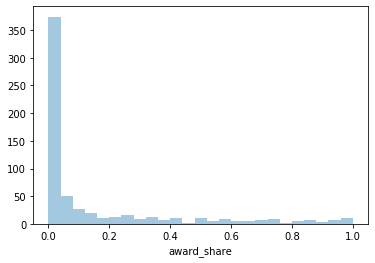

In [28]:
# Let's check the distribution of the target feature, award_share
sns.distplot(df['award_share'], kde=False);

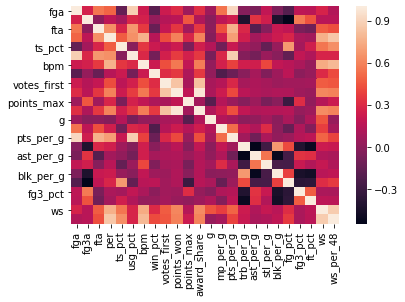

In [29]:
sns.heatmap(df.corr(), fmt=".2f");

## Feature selection

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor

In [31]:
orig_features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
                 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
                 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
                 'ws', 'ws_per_48', 'win_pct']

In [32]:
x_data = df[orig_features].to_numpy()
y_data = df[['award_share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

In [15]:
x_data.shape, y_data.shape

((637, 19), (637,))

### Checking the most important features using Random Forest

In [37]:
regressor = RandomForestRegressor(n_estimators=200)

In [38]:
regressor.fit(x_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

In [40]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

ws: 0.38823896977009464
win_pct: 0.12674763806442013
per: 0.1070946688156062
bpm: 0.056556351703013125
ws_per_48: 0.039869090567403766
fga: 0.036844667803568557
usg_pct: 0.030749421284252884
ast_per_g: 0.024838489163130625
ft_pct: 0.02442596798071554
mp_per_g: 0.022890425064467337
fta: 0.022857777643974193
fg_pct: 0.02168949411648574
pts_per_g: 0.01730579373103885
ts_pct: 0.01592276601062293
fg3_pct: 0.01576337955863216
trb_per_g: 0.014811918947121793
blk_per_g: 0.012122277345576292
fg3a: 0.010712768889209393
stl_per_g: 0.010558133540665782


### Performing feature selection

In [41]:
selector = SelectKBest(mutual_info_regression, k=5)

In [42]:
best_features = selector.fit_transform(x_data, y_data)

In [43]:
sorted_indices = np.argsort(selector.scores_)[::-1]

In [44]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

ws: 0.2902
per: 0.2780
ws_per_48: 0.2529
bpm: 0.1993
pts_per_g: 0.1540
win_pct: 0.1189
usg_pct: 0.1001
fta: 0.0922
fga: 0.0781
ts_pct: 0.0742
mp_per_g: 0.0697
trb_per_g: 0.0644
fg3a: 0.0375
ft_pct: 0.0311
fg_pct: 0.0292
blk_per_g: 0.0263
ast_per_g: 0.0221
stl_per_g: 0.0164
fg3_pct: 0.0136


#### Selected features

In [46]:
features = ['ts_pct', 'bpm', 'usg_pct', 'pts_per_g', 'trb_per_g', 'per', 'ws', 'win_pct']
target = ['award_share']

In [48]:
mvp_regression_df = df[features + target]

In [49]:
mvp_regression_df.to_csv("nba_mvp_votings.csv")

# What Makes an MVP?

TODO